# Statistical Distributions (and Loot Boxes)!

![Statistical distributions](https://imgur.com/MS8y9pw.jpg)

#### 1. What is distribution?

Distribution is all the values a variable takes and the frequency at which it takes each value.

#### 2. When summarizing the distribution of a variable, what are the three aspects of distributions we want to make sure we summarize?

- Centre: mean, median, mode
- Spread: standard deviation, variance, range, interquartile range
- Shape: skewed, symmetric, Normal

#### 3. What is a Bernoulli random variable?

A Bernoulli distribution has two outcomes, usually called "success" and "failure." 

The only parameter is the probability of success  𝑝 

#### 4. What is the relationship between the Bernoulli and Binomial distributions?

A Binomial distribution counts the number of successes we observe in a fixed number of  𝑛  independent Bernoulli trials.

#### 5. What is the relationship between the Binomial and Poisson distributions?

When we take the Binomial distribution and examine its behavior when $n\rightarrow\infty$ and $p\rightarrow 0$, we get the Poisson distribution

#### 6. What is the relationship between the Exponential and Geometric distributions?

Like the Poisson distribution is the Binomial distribution taken to the limit, the Exponential distribution is the Geometric distribution taken to the limit.

#### Central Limit Theorem!

a) Let's create a population of 10,000 observations from a Normal distribution with mean 500 and standard deviation 100. Save this as `population`. Before this step, let's set our random seed to 45.

In [23]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(45)
population = np.random.normal(500, 100, 10000)

b) Let's generate 1,000 random samples of size 5 from `population`. We'll calculate the mean of each of these samples (so we'll have 1,000 means) and put them in a list `norm_samples_5`.

In [24]:
sample = np.random.choice(population, size = 50, replace = False)

In [25]:
norm_sample_5 = [np.mean(np.random.choice(population, 5)) for i in range(1000)]

In [26]:
np.mean(norm_sample_5)

500.5296271541116

We simulated the sampling distribution of $\bar{X}$ when we took the mean of 1,000 samples from the population. This isn't exactly what the sampling distribution of $\bar{X}$ is, but it's close enough for our purposes! 

(In general, we'd actually take every possible sample of size 5 from our population, but that can get really complicated.)

c) Plot `norm_samples_5` **with** a kernel density estimate using `seaborn.distplot`.

In [27]:
import seaborn as sns

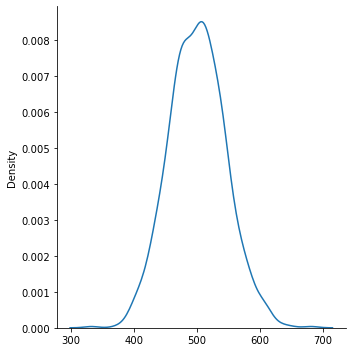

In [28]:
sns.displot(norm_sample_5, kind="kde");

Note that it's a normal distribution.

Now, let's generate 1,000 random samples of size 50 from `population`. We'll calculate the mean of each of these samples (giving us 1,000 means) and put them in a list `norm_samples_50`.

In [29]:
norm_sample_50 = [np.mean(np.random.choice(population, 50)) for i in range(1000)]

In [30]:
np.mean(norm_sample_50)

499.0730363863403

f) Let's plot `norm_samples_50` **with** a kernel density estimate using `seaborn.distplot`.

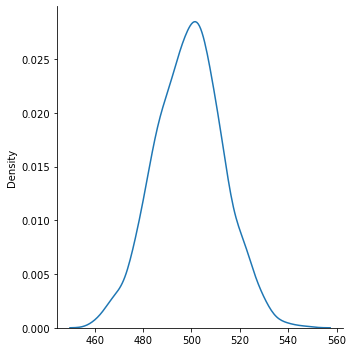

In [31]:
sns.displot(norm_sample_50, kind="kde");

Let's set another random seed and have it select between three distribution typess 10,000 and add each selection to a list.

In [32]:
import random

In [33]:
random.seed(46)
population_2 = [np.random.choice([np.random.poisson(2),np.random.poisson(10),np.random.exponential(5)]) for i in range(10000)]

Note that the resultion distribution isn't't normal because, because we're deriving them are discrete distribtuons.

Now let's generate 1,000 random samples of size 5 from `population_2`, calculate the mean of each of these samples (giving us 1,000 means) and put them in a list `poiexp_samples_5`.

In [34]:
poiexp_samples_5 = [np.mean(np.random.choice(population_2, 5)) for i in range(1000)]

l) Let's plot `poiexp_samples_5` **with** a kernel density estimate using `seaborn.distplot`.

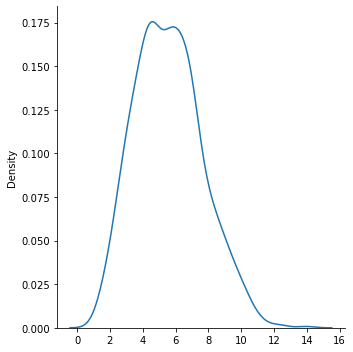

In [35]:
sns.displot(poiexp_samples_5, kind="kde");

Notice that the distribution is right-skewed.

n) Let's generate 1,000 random samples of size 50 from `population_2`, calculate the mean of each of these samples and put them in a list `poiexp_samples_50`.

In [36]:
poiexp_samples_50 = [np.mean(np.random.choice(population_2, 50)) for i in range(1000)]

Let's plot `poiexp_samples_50` with a kernel density estimate using seaborn.distplot.

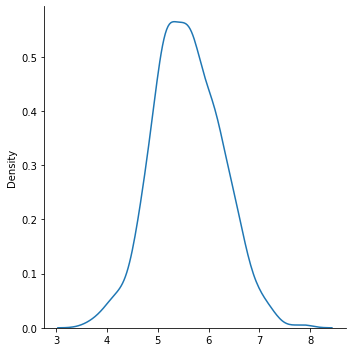

In [37]:
sns.displot(poiexp_samples_50, kind="kde");

Looks like a normal distribution doesn't it?

**You just observed the Central Limit Theorem. Let's make this a bit more explicit.**

When our original data came from a Normal distribution (`population`) and we looked at the sampling distribution of $\bar{X}$ for $n=5$ (`norm_samples_5`), the shape of the sampling distribution of $\bar{X}$ is normal.

When our original data came from a Normal distribution (`population`) and we looked at the sampling distribution of $\bar{X}$ for $n=50$ (`norm_samples_50`), the shape of the sampling distribution of $\bar{X}$ is normal.

So, if our original population is a Normal distribution, the sampling distribution shape is normal - regardless of sample size.

<br>

When our original data came from a non-Normal distribution (`population_2`) and we looked at the sampling distribution of $\bar{X}$ for $n=5$ (`poiexp_samples_5`), the shape of the sampling distribution of $\bar{X}$ is non-normal/right-skewed.

When our original data came from a non-Normal distribution (`population_2`) and we looked at the sampling distribution of $\bar{X}$ for $n=50$ (`poiexp_samples_50`), the shape of the sampling distribution of $\bar{X}$ is normal.

So, if our original population is not a Normal distribution, the sampling distribution will  not necessarily be normal like when $n$ is small (like 5).

If our original population is not a Normal distribution, the sampling distribution will be normal when $n$ is large (like 50).

When you sample from a non-Normal distribution, our sampling distribution of $\bar{X}$ becomes more normal as we increase $n$.

### Part 2
# "Fun with Loot Boxes" Lab

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

**Important information** Loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

15

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

In [38]:
from scipy import stats as stats
n_boxes = 100
p_elixir = 0.15

elixir_dist = stats.binom(n_boxes, p_elixir)

In [39]:
count = 0
definite_elixir = 0.99
while elixir_dist.cdf(count) <= definite_elixir:
    count += 1
print (count)

24


#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. $X$ here is a discrete random variable because it can only take on a countable number of distinct values.

#### Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

<b>Answer:</b> Binomial.

#### So, again, our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" How do we figure this out? Well, how about we use the probability mass function to answer the boss' question?

In [1]:
import scipy.stats as stats

In [2]:
# What is the probability of getting 21 elixirs out of 100 loot boxes?
stats.binom(n=100, p=0.15).pmf(21)

0.027041674394231836

In [3]:
# What is the probability of getting 22 elixirs out of 100 loot boxes?
stats.binom(n=100, p=0.15).pmf(22)

0.017136034308643126

In [4]:
# Instantiate prob at 0.
prob = 0

# Iterate through getting 21, 22, 23, ..., 100 elixirs.
for successes in range(21,101):

    # Use the .pmf() method to get P(X = successes) and add to prob.
    prob += stats.binom(n=100, p=0.15).pmf(successes)

print(prob)
# Use f-string to print result embedded in a string.
print(f'The probability that a user gets more than 20 elixirs in 100 loot boxes is {round(prob * 100, 5)}%.')
# I calculated the probability, multiplied it by 100 to turn it 
# into a percentage, then rounded it to 5 decimal places.

0.06631976581888226
The probability that a user gets more than 20 elixirs in 100 loot boxes is 6.63198%.


#### Let's try another way to answer the boss's question. This time, let's use the cumulative distribution function.

In [6]:
# What is the probability of getting 20 or fewer elixirs out of 100 loot boxes?
stats.binom(n=100, p=0.15).cdf(20)

0.9336802341811183

In [7]:
# What is the probability of getting more than 20 elixirs out of 100 loot boxes?
prob = 1 - stats.binom(n=100, p=0.15).cdf(20)

print(prob)
# Use f-string to print result embedded in a string.
print(f'The probability that a user gets more than 20 elixirs in 100 loot boxes is {round(prob * 100, 5)}%.')
# I calculated the probability, multiplied it by 100 to turn it 
# into a percentage, then rounded it to 5 decimal places.

0.06631976581888166
The probability that a user gets more than 20 elixirs in 100 loot boxes is 6.63198%.


#### So about 6 and a half percent.

#### Or we could say something along the lines of:

"If we have 25,000 users and all 25,000 of our users had earned 100 loot boxes, then we'd expect about 1,650 of those users to get more than 20 elixirs."